## Preparing the dataset

In [ ]:
! pip install emoji --upgrade
import emoji
# Converts emojis to strings

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42069)

Load the Training data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Alcoris0987/NLP-Project/main/olid-training-v1.0.tsv', sep='\t')
df

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
...,...,...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,OFF,TIN,IND
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,NaN,NaN
13237,82921,@USER And why report this garbage. We don't g...,OFF,TIN,OTH
13238,27429,@USER Pussy,OFF,UNT,NaN


Load tweet comments with emojis.

In [ ]:
df.loc[13236,'tweet']

'Benidorm ✅  Creamfields ✅  Maga ✅   Not too shabby of a summer'

Test Emojis for Python and apply it to the training data.

In [ ]:
print(emoji.demojize(df.loc[13236,'tweet']))

Benidorm :check_mark_button:  Creamfields :check_mark_button:  Maga :check_mark_button:   Not too shabby of a summer


In [ ]:
empty = []
for row in df['tweet']:
  row = emoji.demojize(row)
  empty.append(row)
df['demojitweet'] = empty
df

,id,tweet,subtask_a,subtask_b,subtask_c,demojitweet
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN,@USER She should ask a few native Americans wh...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND,@USER @USER Go home you’re drunk!!! @USER #MAG...
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN,Amazon is investigating Chinese employees who ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN,"@USER Someone should'veTaken"" this piece of sh..."
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN,@USER @USER Obama wanted liberals &amp; illega...
...,...,...,...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,OFF,TIN,IND,@USER Sometimes I get strong vibes from people...
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,NaN,NaN,Benidorm :check_mark_button: Creamfields :che...
13237,82921,@USER And why report this garbage. We don't g...,OFF,TIN,OTH,@USER And why report this garbage. We don't g...
13238,27429,@USER Pussy,OFF,UNT,NaN,@USER Pussy


In [ ]:
df2 = df.drop(columns=['tweet'])
df2

,id,subtask_a,subtask_b,subtask_c,demojitweet
0,86426,OFF,UNT,NaN,@USER She should ask a few native Americans wh...
1,90194,OFF,TIN,IND,@USER @USER Go home you’re drunk!!! @USER #MAG...
2,16820,NOT,NaN,NaN,Amazon is investigating Chinese employees who ...
3,62688,OFF,UNT,NaN,"@USER Someone should'veTaken"" this piece of sh..."
4,43605,NOT,NaN,NaN,@USER @USER Obama wanted liberals &amp; illega...
...,...,...,...,...,...
13235,95338,OFF,TIN,IND,@USER Sometimes I get strong vibes from people...
13236,67210,NOT,NaN,NaN,Benidorm :check_mark_button: Creamfields :che...
13237,82921,OFF,TIN,OTH,@USER And why report this garbage. We don't g...
13238,27429,OFF,UNT,NaN,@USER Pussy


Check for missing values and repetitions.

In [ ]:
print(f"Missing values: {df['subtask_a'].isnull().values.any()}")
print(f"Repetitions: {len(df) != len(df['id'].unique())}")


Missing values: False
Repetitions: False


Convert offensive labels to 1 and not offensive ones to 0.

In [ ]:
df['subtask_a'] = df['subtask_a'].map({'OFF': 1, 'NOT': 0})

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df['tweet']
y = df['subtask_a']

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9930,)
(3310,)
(9930,)
(3310,)


In [ ]:
### Vectorization ### WIP

# from sklearn.feature_extraction.text import TfidfVectorizer
# matrix = vect.fit_transform(df)
# vect = TfidfVectorizer()
# vect.fit(X_train, y_train)
# vect.transform(X_train, y_train)

Import the relevant tools.

In [ ]:
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from ast import literal_eval
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
import nltk
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import time

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
### !!! Old Code !!! ###

# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()

# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# rfc_pipeline = Pipeline([
#                 ('tfidf', TfidfVectorizer()),
#                 ('rfc', RandomForestClassifier()),
#             ])


# rfc_pipeline.fit(X_train, y_train)
# prediction = rfc_pipeline.predict(X_test)

# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, prediction)

# Classical Models
The data is trained on six different classical machine learning models. A pipeline is used for each model to fit the data. Then, a prediction is made for each model. The running times for fitting the models are also measured.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
###############################################

from sklearn.ensemble import RandomForestClassifier

start = time.time()

rfc_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier()),
            ])


rfc_pipeline.fit(X_train, y_train)
rfc_prediction = rfc_pipeline.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_prediction)

end = time.time()
rfc_time = end-start

print("Scores:")
print(f"Random Forest: {rfc_score}")

###############################################

from sklearn.tree import DecisionTreeClassifier

start = time.time()

dtc_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('dtc', DecisionTreeClassifier()),
            ])

dtc_pipeline.fit(X_train, y_train)
dtc_prediction = dtc_pipeline.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_prediction)

end = time.time()
dtc_time = end-start

print(f"Decision Tree: {dtc_score}")

###############################################

from sklearn.neighbors import KNeighborsClassifier

start = time.time()

knc_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('knc', KNeighborsClassifier()),
            ])

knc_pipeline.fit(X_train, y_train)
knc_prediction = knc_pipeline.predict(X_test)
knc_score = accuracy_score(y_test, knc_prediction)

end = time.time()
knc_time = end-start

print(f"K-Nearest Neighbors: {knc_score}")

###############################################

from sklearn.linear_model import LogisticRegression

start = time.time()

lr_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression()),
            ])

lr_pipeline.fit(X_train, y_train)
lr_prediction = lr_pipeline.predict(X_test)
lr_score = accuracy_score(y_test, lr_prediction)

end = time.time()
lr_time = end-start

print(f"Logistic Regression: {lr_score}")

###############################################

from sklearn.svm import SVC

start = time.time()

svc_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('svc', SVC()),
            ])

svc_pipeline.fit(X_train, y_train)
svc_prediction = svc_pipeline.predict(X_test)
svc_score = accuracy_score(y_test, svc_prediction)

end = time.time()
svc_time = end-start

print(f"Support Vector: {svc_score}")

###############################################

from sklearn.naive_bayes import MultinomialNB

start = time.time()

mnb_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('mnb', MultinomialNB()),
            ])

mnb_pipeline.fit(X_train, y_train)
mnb_prediction = mnb_pipeline.predict(X_test)
mnb_score = accuracy_score(y_test, mnb_prediction)

end = time.time()
mnb_time = end-start

print(f"Multinomial NB: {mnb_score}")
print("\n **************************** \n")
print("Run times:")
print(f"Random Forest: {rfc_time}")
print(f"Decision Tree: {dtc_time}")
print(f"K-Nearest Neighbors: {knc_time}")
print(f"Logistic Regression: {lr_time}")
print(f"Support Vector: {svc_time}")
print(f"Multinomial NB: {mnb_time}")

Scores:
Random Forest: 0.751963746223565
Decision Tree: 0.697583081570997
K-Nearest Neighbors: 0.7114803625377644
Logistic Regression: 0.7570996978851964
Support Vector: 0.7574018126888218
Multinomial NB: 0.6945619335347432

 **************************** 

Run times:
Random Forest: 24.715012788772583
Decision Tree: 8.141461849212646
K-Nearest Neighbors: 3.380333185195923
Logistic Regression: 1.6506738662719727
Support Vector: 32.22824835777283
Multinomial NB: 0.3094773292541504


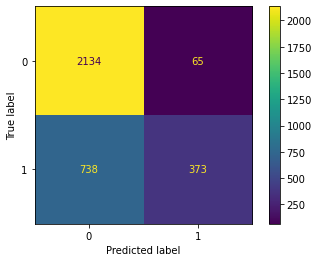

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, svc_prediction, labels=svc_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svc_pipeline.classes_)
disp.plot()

plt.show()

In [ ]:
from math import sqrt

tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
mcc = (tp*tn - fp*fn) / sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(f"tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}, mcc:{mcc}")

tn:2134, fp:65, fn:738, tp:373, mcc:0.42668723248530105


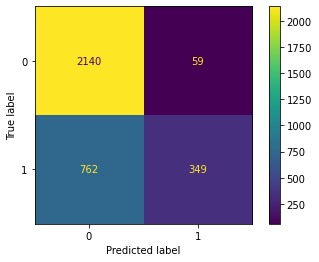

tn:2140, fp:59, fn:762, tp:349, mcc:0.4126939004733915


In [ ]:
cm = confusion_matrix(y_test, rfc_prediction, labels=rfc_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rfc_pipeline.classes_)
disp.plot()

plt.show()

tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
mcc = (tp*tn - fp*fn) / sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(f"tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}, mcc:{mcc}")

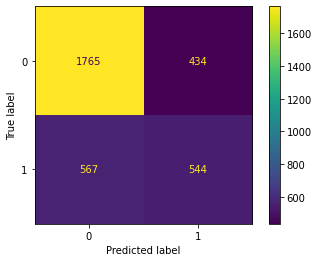

tn:1765, fp:434, fn:567, tp:544, mcc:0.3025134867571338


In [ ]:
cm = confusion_matrix(y_test, dtc_prediction, labels=dtc_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=dtc_pipeline.classes_)
disp.plot()

plt.show()

tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
mcc = (tp*tn - fp*fn) / sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(f"tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}, mcc:{mcc}")

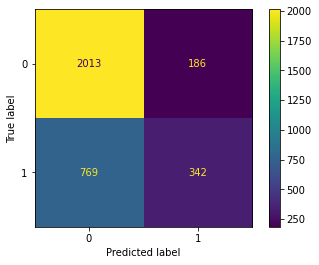

tn:2013, fp:186, fn:769, tp:342, mcc:0.2879118371147352


In [ ]:
cm = confusion_matrix(y_test, knc_prediction, labels=knc_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knc_pipeline.classes_)
disp.plot()

plt.show()

tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
mcc = (tp*tn - fp*fn) / sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(f"tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}, mcc:{mcc}")

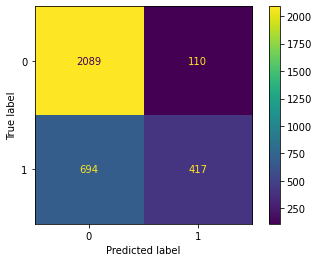

tn:2089, fp:110, fn:694, tp:417, mcc:0.419866814277145


In [ ]:
cm = confusion_matrix(y_test, lr_prediction, labels=lr_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lr_pipeline.classes_)
disp.plot()

plt.show()

tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
mcc = (tp*tn - fp*fn) / sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(f"tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}, mcc:{mcc}")

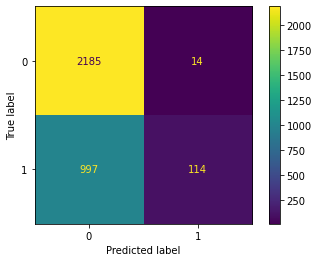

tn:2185, fp:14, fn:997, tp:114, mcc:0.2357148920182477


In [ ]:
cm = confusion_matrix(y_test, mnb_prediction, labels=mnb_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=mnb_pipeline.classes_)
disp.plot()

plt.show()

tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
mcc = (tp*tn - fp*fn) / sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(f"tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}, mcc:{mcc}")

Among the six classical models, Support Vector Classifier yields the highest accuracy, followed by Logistic Regression, and Random Forest Classifier. However, Support Vector Classifier has also the longest running time, which is more than twice as long as the second slowest model, Random Forest Classifier. 

The scores for each model are visualised in a vertical bar graph. The fraction digits after the fourth one are rounded for ease in reading.

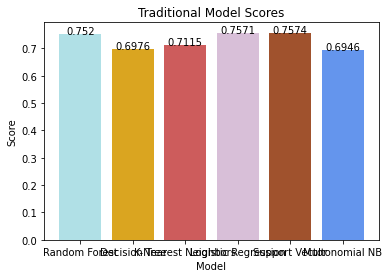

In [ ]:
scores = {"Random Forest": round(rfc_score, 4),
          "Decision Tree": round(dtc_score, 4),
          "K-Nearest Neighbors": round(knc_score, 4),
          "Logistic Regression": round(lr_score, 4),
          "Support Vector": round(svc_score, 4),
          "Multonomial NB": round(mnb_score, 4)}

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

score_list = scores.items()
x_ax, y_ax = zip(*score_list) 

plt.bar(x_ax, y_ax, color=['powderblue', 'goldenrod', 'indianred', 'thistle', 'sienna', 'cornflowerblue'])
addlabels(x_ax, y_ax)
plt.title("Traditional Model Scores")
plt.xlabel('Model')
plt.ylabel('Score')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

The running times for each model are also visualised.

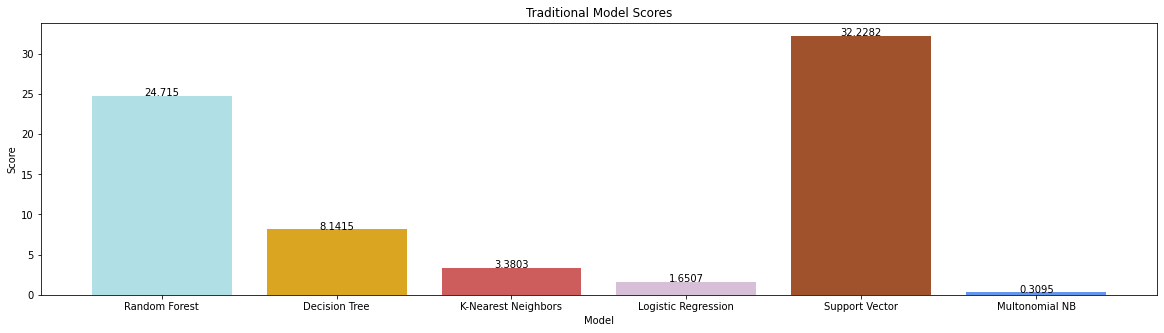

In [ ]:
run_times = {"Random Forest": round(rfc_time, 4),
             "Decision Tree": round(dtc_time, 4),
             "K-Nearest Neighbors": round(knc_time, 4),
             "Logistic Regression": round(lr_time, 4),
             "Support Vector": round(svc_time, 4),
             "Multonomial NB": round(mnb_time, 4)}

time_list = run_times.items()
x_ax, y_ax = zip(*time_list)

plt.bar(x_ax, y_ax, color=['powderblue', 'goldenrod', 'indianred', 'thistle', 'sienna', 'cornflowerblue'])
addlabels(x_ax, y_ax)
plt.title("Traditional Model Scores")
plt.xlabel('Model')
plt.ylabel('Score')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

In order to further improve the model with the highest accuracy, Support Vector Classifier is trained with a grid search cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = { 
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'degree': [1,3,5],
    'gamma' : ['scale', 'auto'],
    'shrinking': [True, False],
}

gs_svc = GridSearchCV(estimator=SVC(),
                     param_grid=grid,
                     cv=3,
                     verbose=2)
gs_svc_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('gs_svc', gs_svc),
            ])

gs_svc_pipeline.fit(X_train, y_train)
prediction = gs_svc_pipeline.predict(X_test)

print(accuracy_score(y_test, prediction))
print(f"Best parameters: {gs_svc.best_params_}\n")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END degree=1, gamma=scale, kernel=linear, shrinking=True; total time=   9.2s
[CV] END degree=1, gamma=scale, kernel=linear, shrinking=True; total time=   9.2s
[CV] END degree=1, gamma=scale, kernel=linear, shrinking=True; total time=   8.9s
[CV] END degree=1, gamma=scale, kernel=linear, shrinking=False; total time=   8.7s
[CV] END degree=1, gamma=scale, kernel=linear, shrinking=False; total time=   8.8s
[CV] END degree=1, gamma=scale, kernel=linear, shrinking=False; total time=   8.6s
[CV] END ..degree=1, gamma=scale, kernel=rbf, shrinking=True; total time=  11.4s
[CV] END ..degree=1, gamma=scale, kernel=rbf, shrinking=True; total time=  11.4s
[CV] END ..degree=1, gamma=scale, kernel=rbf, shrinking=True; total time=  11.4s
[CV] END .degree=1, gamma=scale, kernel=rbf, shrinking=False; total time=  11.4s
[CV] END .degree=1, gamma=scale, kernel=rbf, shrinking=False; total time=  11.6s
[CV] END .degree=1, gamma=scale, kerne

The model yields a higher accuracy score after cross-validating with the grid. The best parameters in the grid are stored.